# Setup

In [42]:

# import modules
import xgboost
import shap
import pandas as pd

# load JS visualization code to notebook
shap.initjs()

# load dataset
Xraw,y = shap.datasets.boston()


___

# Rename Columns

In [43]:
X = (
    Xraw
    .rename(columns={
        'CRIM' :    'Crime Rate'
    ,   'INDUS':    'Size Of Industrial Zone'
    ,   'NOX':      'Nox PPM'
    ,   'RM':       'Avg Number Of Rooms'
    ,   'AGE':      'Percentage Of Old Housings'
    ,   'DIS':      'Distance To Employment Centers'
    ,   'TAX':      'Property Tax Rate'
    ,   'PTRATIO':  'Student Teacher Ratio'
    ,   'LSTAT':    'Percentage Of Lower Income Households'
    })
    .drop(columns=['ZN','CHAS','B','RAD'])
)

___

# Results before reshuffling

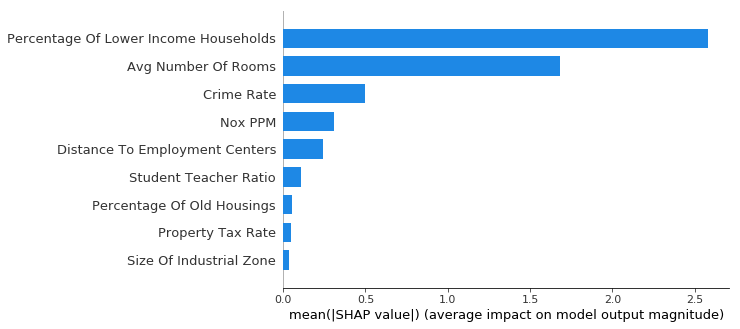

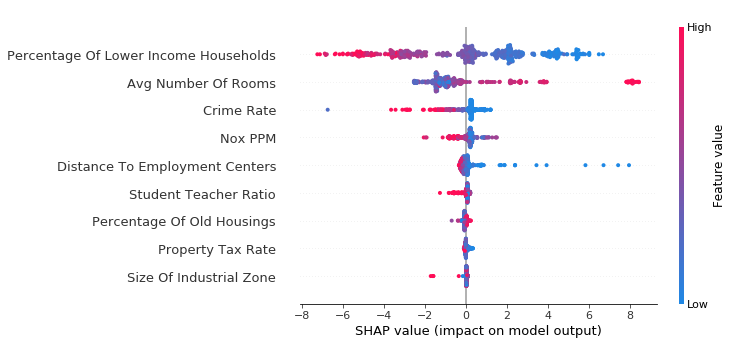

In [45]:

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features (average impact)
shap.summary_plot(shap_values, X, plot_type="bar")

# summarize the effects of all the features
shap.summary_plot(shap_values, X)
